In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

In [111]:
x, y = make_regression(n_samples=100, n_features=3)

In [112]:
x.shape

(100, 3)

In [113]:
y.shape

(100,)

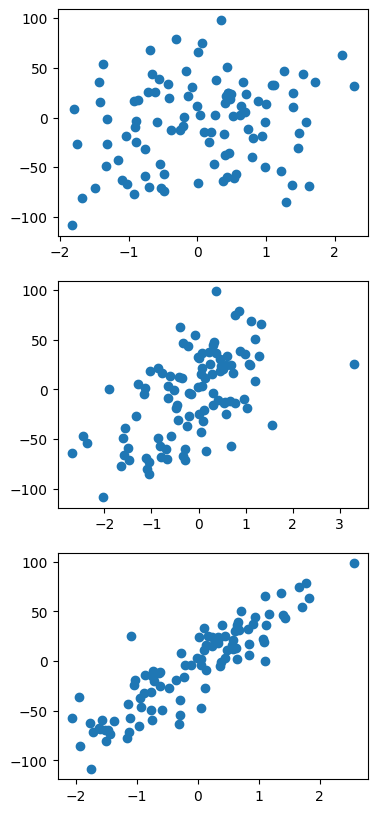

In [114]:
plt.figure(figsize=(4, 10))
plt.subplot(3, 1, 1)
plt.scatter(x[:, 0], y)

plt.subplot(3, 1, 2)
plt.scatter(x[:, 1], y)

plt.subplot(3, 1, 3)
plt.scatter(x[:, 2], y)

plt.show()

In [115]:
x_train = x[:90, :]
x_test = x[90:, :]
y_train = y[:90]
y_test = y[90:]

In [116]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(90, 3) (10, 3) (90,) (10,)


In [117]:
x_train = np.insert(x_train, 0, 1, axis = 1)

In [118]:
x_train.shape

(90, 4)

In [119]:
x_train[0]

array([ 1.        ,  2.10264696, -0.39460075,  1.82176773])

In [120]:
def personal_MLR(x_train, y_train):
    beta = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)

    bias = beta[0]
    coefficients = beta[1 : ]

    return bias, coefficients 

In [121]:
bias, coef = personal_MLR(x_train, y_train)

In [122]:
bias

-3.9968028886505635e-15

In [123]:
coef

array([ 3.32083236, 20.16436561, 35.24116291])

In [128]:
# x_test = np.insert(x_test, 0, 1, axis = 1)

In [125]:
x_test.shape

(10, 4)

In [126]:
def predict(x_test):
    y_pred = np.dot(x_test, coef) + bias
    print(y_pred.shape)
    return y_pred

In [127]:
y_pred  = predict(x_test)

ValueError: shapes (10,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

In [77]:
y_pred

array([ 44.01703202,  20.64324093, -13.01402662, -45.44795438,
        73.68574798,  54.07139381, -37.91476241,  16.07856137,
        65.94810988,  59.33592722])

In [78]:
y_test.shape

(10,)

In [79]:
for i in range(y_pred.shape[0]):
    print(y_pred[i], y_test[i])

44.017032018226814 44.017032018226814
20.643240933040993 20.643240933040985
-13.014026621628641 -13.014026621628641
-45.447954377709095 -45.447954377709095
73.68574797683637 73.68574797683637
54.07139380583223 54.07139380583223
-37.91476241191772 -37.91476241191772
16.078561365820125 16.07856136582012
65.94810988055808 65.94810988055808
59.33592722079912 59.33592722079912


In [86]:
def total_error(y_pred, y_test):
    error = 0
    for i in range(y_pred.shape[0]):
        error += (y_test[i] - y_pred[i])**2
    return error

In [87]:
loss = total_error(y_pred, y_test)

In [88]:
loss

6.310887241768094e-29

In [89]:
bias

2.8033131371785203e-15

In [90]:
coef

array([22.31465875, 26.79901442, 20.76218226])

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=2)

In [104]:
model.fit(x_train, y_train)

LinearRegression()

In [105]:
model.coef_

array([22.31465875, 26.79901442, 20.76218226])

In [106]:
model.intercept_

0.0

In [107]:
predictions = model.predict(x_test)

In [109]:
score = 0
for i in range(y_pred.shape[0]):    
    if predictions[i] == y_test[i]:
        score += 1
print(score)

1


In [110]:
for i in range(y_pred.shape[0]):
    print(predictions[i], y_test[i])

7.5767024742550655 7.576702474255092
-27.52475035585085 -27.524750355850855
-48.67937377396458 -48.67937377396458
-13.265951738369294 -13.265951738369319
102.44929886196546 102.4492988619655
-27.940465980762944 -27.940465980762976
19.1995815173439 19.199581517343937
-55.92248500072417 -55.92248500072418
18.413553831157973 18.413553831157984
-81.34715704590876 -81.34715704590877
